In [1]:
%pip install sklearn
%pip install quandl
%pip install openpyxl
%pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import math
import requests
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import os
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import quandl
import pandas as pd
from openpyxl import load_workbook
import yfinance as yf
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns
import sklearn
from sklearn.metrics import r2_score
from keras.layers import Dropout
import numpy
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder 
from matplotlib import pyplot

In [2]:
#Note: simple scenario and fixed DONE
dxy_csv = os.path.abspath('data/dxy_price.csv')
dxy = pd.read_csv(dxy_csv) 
dxy = dxy.dropna()
dxy.drop(['Volume'], axis = 1, inplace = True)
dxy['Avg']=dxy.mean(axis = 1)
dxy.set_index('Date', inplace = True)
dxy['MA3']= dxy['Avg'].shift(1).rolling(window = 3).mean()
dxy['MA9']= dxy['Avg'].shift(1).rolling(window = 9).mean()
dxy = dxy.dropna()

C:\Users\spyro\AppData\Local\Temp\ipykernel_13404\3714440422.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dxy['Avg']=dxy.mean(axis = 1)


Epoch 1/20
8817/8817 - 20s - loss: 4.8149e-04 - 20s/epoch - 2ms/step
Epoch 2/20
8817/8817 - 18s - loss: 3.2484e-04 - 18s/epoch - 2ms/step
Epoch 3/20
8817/8817 - 18s - loss: 4.0451e-04 - 18s/epoch - 2ms/step
Epoch 4/20
8817/8817 - 18s - loss: 4.6272e-04 - 18s/epoch - 2ms/step
Epoch 5/20
8817/8817 - 18s - loss: 4.5260e-04 - 18s/epoch - 2ms/step
Epoch 6/20
8817/8817 - 18s - loss: 3.8491e-04 - 18s/epoch - 2ms/step
Epoch 7/20
8817/8817 - 18s - loss: 3.1730e-04 - 18s/epoch - 2ms/step
Epoch 8/20
8817/8817 - 18s - loss: 2.6236e-04 - 18s/epoch - 2ms/step
Epoch 9/20
8817/8817 - 18s - loss: 2.1875e-04 - 18s/epoch - 2ms/step
Epoch 10/20
8817/8817 - 18s - loss: 1.8429e-04 - 18s/epoch - 2ms/step
Epoch 11/20
8817/8817 - 18s - loss: 1.5826e-04 - 18s/epoch - 2ms/step
Epoch 12/20
8817/8817 - 18s - loss: 1.3841e-04 - 18s/epoch - 2ms/step
Epoch 13/20
8817/8817 - 18s - loss: 1.2333e-04 - 18s/epoch - 2ms/step
Epoch 14/20
8817/8817 - 20s - loss: 1.1173e-04 - 20s/epoch - 2ms/step
Epoch 15/20
8817/8817 - 20s -

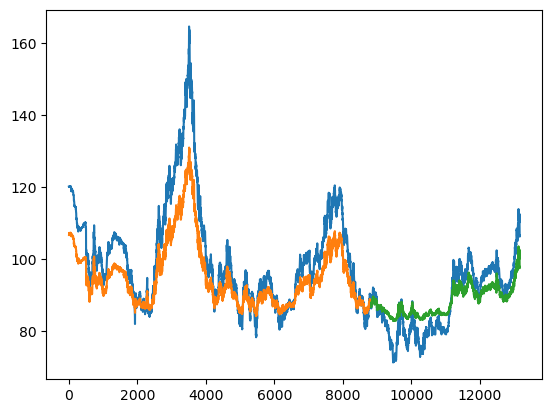

In [17]:
dxy_lstm = pd.DataFrame(dxy['Avg'])
def create_dataset(dataset, look_back=1):
 dataX, dataY = [], []
 for i in range(len(dataset)-look_back-1):
  a = dataset[i:(i+look_back), 0]
  dataX.append(a)
  dataY.append(dataset[i + look_back, 0])
 return np.array(dataX), np.array(dataY)
np.random.seed(7)
dataset = dxy_lstm.values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
'''***********************************************'''
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(1):
 model.fit(trainX, trainY, epochs=20, batch_size=batch_size, verbose=2, shuffle=False)
 model.reset_states()
    
'''**********************************************'''        
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

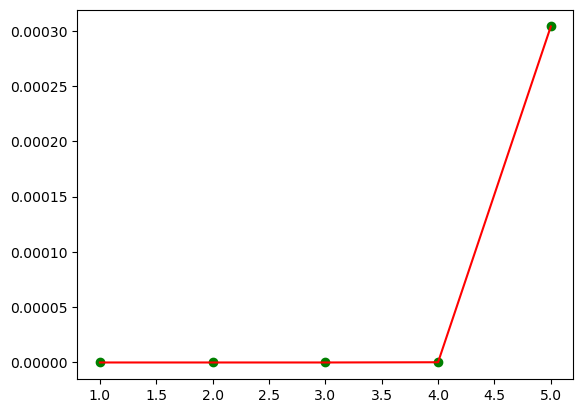

In [3]:
x_values = pd.DataFrame(dxy[['Open','High', 'Low', 'Adj Close', 'Close', 'MA3', 'MA9']]).values
y_values = dxy['Avg'].values


number_degrees = [1,2,3,4,5]
plt_mean_squared_error = []
for degree in number_degrees:

   poly_model = PolynomialFeatures(degree=degree)
  
   poly_x_values = poly_model.fit_transform(x_values)
   poly_model.fit(poly_x_values, y_values)
  
   regression_model = LinearRegression()
   regression_model.fit(poly_x_values, y_values)
   y_predi = regression_model.predict(poly_x_values)
  
   plt_mean_squared_error.append(mean_squared_error(y_values, y_predi, squared=False))
  
plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red") 

initial values [120.239998   120.239998   120.239998   120.239998   120.239998
 120.25999967 120.272222  ]
Mapped to [1.00000000e+00 1.20239998e+02 1.20239998e+02 1.20239998e+02
 1.20239998e+02 1.20239998e+02 1.20260000e+02 1.20272222e+02
 1.44576571e+04 1.44576571e+04 1.44576571e+04 1.44576571e+04
 1.44576571e+04 1.44600621e+04 1.44615317e+04 1.44576571e+04
 1.44576571e+04 1.44576571e+04 1.44576571e+04 1.44600621e+04
 1.44615317e+04 1.44576571e+04 1.44576571e+04 1.44576571e+04
 1.44600621e+04 1.44615317e+04 1.44576571e+04 1.44576571e+04
 1.44600621e+04 1.44615317e+04 1.44576571e+04 1.44600621e+04
 1.44615317e+04 1.44624675e+04 1.44639374e+04 1.44654074e+04]


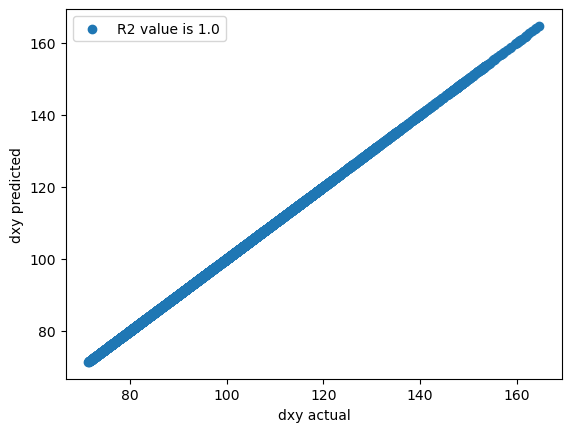

In [6]:
degree=2
poly_model = PolynomialFeatures(degree=degree)
poly_x_values = poly_model.fit_transform(x_values)

print(f'initial values {x_values[0]}\nMapped to {poly_x_values[0]}')
poly_model.fit(poly_x_values, y_values)
regression_model = LinearRegression()

regression_model.fit(poly_x_values, y_values)

y_pred = regression_model.predict(poly_x_values)

regression_model.coef_

mean_squared_error(y_values, y_pred, squared=False)
predictions = pd.DataFrame(data = y_pred,
                  index = dxy.index, 
                  columns = ['Predicted dxy'])
coefficient_of_dermination = r2_score(predictions['Predicted dxy'], dxy['Avg'])

plt.scatter(predictions['Predicted dxy'], dxy['Avg'], label = f'R2 value is {coefficient_of_dermination}')
plt.legend()
plt.ylabel('dxy predicted')
plt.xlabel('dxy actual')
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(dxy[['Open', 'High', 'Low', 'Close', 'Adj Close', 'MA3', 'MA9']], dxy['Avg'], random_state=0, train_size = .75)
model = Sequential()
model.add(Dense(128, activation="relu", input_dim=7))
model.add(Dense(32, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="linear"))
model.compile(loss='mean_squared_error', optimizer=Adam(lr=1e-3, decay=1e-3 / 200))
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5000, batch_size=100, verbose=2, callbacks=[es])
PredTestSet = model.predict(X_train)
PredValSet = model.predict(X_test)
numpy.savetxt("trainresults.csv", PredTestSet, delimiter=",")
numpy.savetxt("valresults.csv", PredValSet, delimiter=",")

Epoch 1/5000


c:\Users\spyro\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


99/99 - 1s - loss: 1111.0251 - val_loss: 0.3721 - 725ms/epoch - 7ms/step
Epoch 2/5000
99/99 - 0s - loss: 0.1140 - val_loss: 0.0933 - 135ms/epoch - 1ms/step
Epoch 3/5000
99/99 - 0s - loss: 0.0998 - val_loss: 0.0940 - 132ms/epoch - 1ms/step
Epoch 4/5000
99/99 - 0s - loss: 0.0996 - val_loss: 0.0930 - 132ms/epoch - 1ms/step
Epoch 5/5000
99/99 - 0s - loss: 0.0993 - val_loss: 0.0943 - 131ms/epoch - 1ms/step
Epoch 6/5000
99/99 - 0s - loss: 0.0990 - val_loss: 0.0944 - 121ms/epoch - 1ms/step
Epoch 7/5000
99/99 - 0s - loss: 0.0988 - val_loss: 0.0934 - 147ms/epoch - 1ms/step
Epoch 8/5000
99/99 - 0s - loss: 0.0986 - val_loss: 0.0927 - 132ms/epoch - 1ms/step
Epoch 9/5000
99/99 - 0s - loss: 0.0983 - val_loss: 0.0926 - 136ms/epoch - 1ms/step
Epoch 10/5000
99/99 - 0s - loss: 0.0979 - val_loss: 0.0916 - 132ms/epoch - 1ms/step
Epoch 11/5000
99/99 - 0s - loss: 0.0974 - val_loss: 0.0941 - 147ms/epoch - 1ms/step
Epoch 12/5000
99/99 - 0s - loss: 0.0979 - val_loss: 0.0927 - 138ms/epoch - 1ms/step
Epoch 13/50

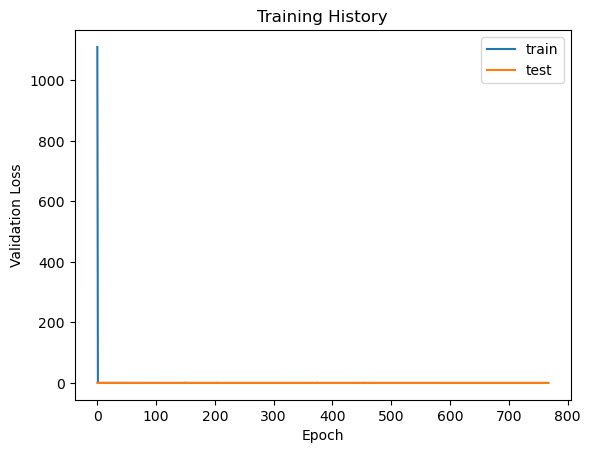

In [8]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
plt.title('Training History'),
plt.xlabel('Epoch'),
plt.ylabel('Validation Loss')
pyplot.show()

Training Set R-Square= 0.9999997938271739


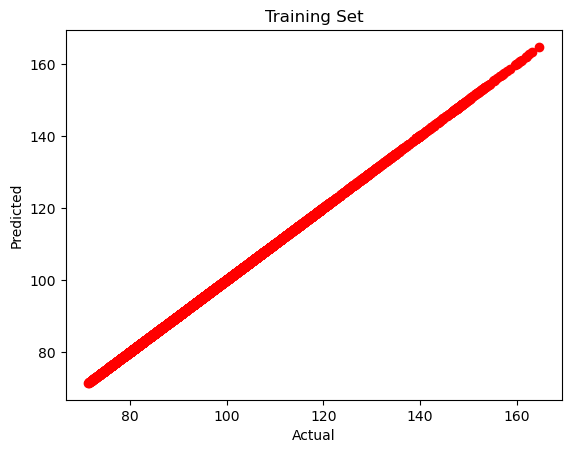

In [9]:
TestResults = numpy.genfromtxt("trainresults.csv", delimiter=",")
plt.plot(y_train,TestResults,'ro')
plt.title('Training Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')
TestR2Value = r2_score(y_train,TestResults)
print("Training Set R-Square=", TestR2Value)